In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

# Helper libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def s(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<2*tf.ones(tf.shape(x))),
                 (-3.*(x-1.)**3 +3.*(x-1.)**2 + 3*(x-1.)+1.)/6.,
                 tf.zeros(tf.shape(x))
                )
    
    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*2<=x, x<3*tf.ones(tf.shape(x))),
                 (3*(x-2)**3 - 6*(x-2)**2 + 4. )/6.,
                 tf.zeros(tf.shape(x))
                )

    y3 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 ( 4. -x)**3/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<2*tf.ones(tf.shape(x))),
                 x**3/6,
                 tf.zeros(tf.shape(x))
                )
    
    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*2<=x, x==x ), 
                  2./3.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/6.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  2.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/12, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/12.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/12.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  1.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/6.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  2.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3 - tf.ones(tf.shape(x))
    
    return y

def partition_weights(n,n0):
    p0 = n0*n
    y = np.zeros((n,p0))
    for i in range(n):
        y[i,i*n0:(i+1)*n0] = 1.
    return y 

def partition_bias(n,n0):
    p0 = n0*n
    return (np.arange(0.,p0)%n0)    

def spline_function_(n,m,c0,u0):
    """Cubic spline"""
    
    d0 = 3 # if the degree is 3 then use the activation function s3(), if it's 2 then use s()
 
    n0 = c0 + d0
    p0 = n0*n

    inn = tf.keras.layers.Input(shape=(n,))

    l00 = tf.keras.layers.Dense(activation=s,
                                units=p0,
                                use_bias=True,
                                trainable=False,
                                kernel_initializer=tf.constant_initializer(c0*partition_weights(n,n0)),
                                bias_initializer=tf.constant_initializer(d0 - partition_bias(n,n0)) 
                               )(inn)
    
    out = tf.keras.layers.Dense(units=m,
                                use_bias=False,
                                trainable=True,
                                kernel_initializer=tf.constant_initializer(u0)
                               )(l00)

    model = tf.keras.Model(inputs=inn, 
                           outputs= out
                          )
    return model


print(tf.__version__)

2.1.0


In [2]:
np.arange(0.,1.,0.1)

np.linspace(0.,1.,11)[:-1]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

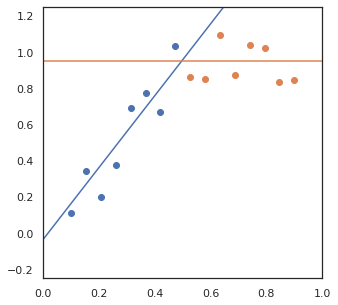

In [35]:
k = 8

xv = np.linspace(0.1,0.9,2*k)

r0 = np.random.RandomState(1989)
g0 = np.random.RandomState(6989)
x0 = xv[:k]
y0 = 2.*x0 + g0.randn(k)*0.15

r1 = np.random.RandomState(1189)
g1 = np.random.RandomState(1729)
x1 = xv[k:]
y1 = 0. + g1.randn(k)*0.1 +  0.93

plt.figure(figsize=(5,5))
plt.xlim(0.,1.)
plt.ylim(-0.25,1.25)

plt.scatter(x0,y0)

plt.scatter(x1,y1)

plt.plot(np.array([-2,2]),np.array([-4,4-0.07]))

plt.plot(np.array([-2,2]),np.array([0.95,0.95]))

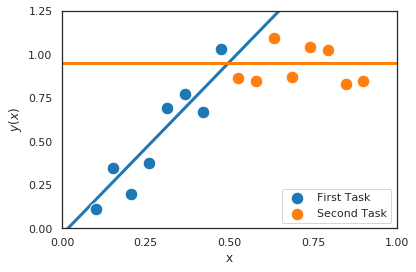

In [70]:
index0 = 3

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_active_point00 = pd.DataFrame(dict(x=x0, y=y0))

fig = plt.figure(10)

g = sns.scatterplot(data=df_active_point00, x="x", y="y",color=sns.color_palette("tab10")[0],
                    zorder=20,label="First Task",s=160)
g.set_xticks(np.arange(-0.5,2.0,0.25))
g.set_yticks(np.arange(0.,1.7,0.1))


# plt.plot(np.array([-2,2]),np.array([-4,4-0.07]))

# plt.plot(np.array([-2,2]),np.array([0.95,0.95]))

df_true_function_00 = pd.DataFrame(dict(x=np.array([-2,2]),y=np.array([-4,4-0.07])))

sns.lineplot(x='x',y='y',data=df_true_function_00,color=sns.color_palette("tab10")[0],linewidth=3)

df_active_point01 = pd.DataFrame(dict(x=x1, y=y1))

fig = plt.figure(10)
#fig = plt.figure(figsize=(10,10))

g = sns.scatterplot(data=df_active_point01, x="x", y="y",color=sns.color_palette("tab10")[1],
                    zorder=20,label="Second Task",s=160)
g.set_xticks(np.arange(0.,1.1,0.25))
g.set_yticks(np.arange(0.,1.3,0.25))

df_true_function_01 = pd.DataFrame(dict(x=np.array([-2,2]),y=np.array([0.95,0.95])))

sns.lineplot(x='x',y='y',data=df_true_function_01,color=sns.color_palette("tab10")[1],linewidth=3)

#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend(loc='lower right')
frame = legend.get_frame()
frame.set_facecolor('white')
plt.ylim(-0.0,1.25)
plt.xlim(0.,1.)

fig.gca().set(xlabel=r'x', ylabel=r'$y(x)$')
fig.savefig("KASAM_Paper_Theory_Plots/Linear_functions_catastrophic_interference.png", 
            close = True, verbose = True, dpi=500)